In [18]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='4d19f1c5-7328-4593-8523-257a08a74f8f', project_access_token='p-f4d5d78e734228858de7318cd695e34dbbfe9879')
pc = project.project_context


In [21]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

# All requested packages already installed.



In [28]:
map_Jacksonville = folium.Map(location=[30.336944, -81.661389], zoom_start=12)
map_Jacksonville 

In [20]:
!pip install beautifulsoup4
!pip install lxml
!pip install requests
import numpy as np 
import pandas as pd #import pandas as pd
import requests # library to handle requests
from bs4 import BeautifulSoup

#Fetch the file
file = project.get_file("JVilleZips.csv")

boroughZips=pd.read_csv(file)
boroughZips

,Zip Codes,Borough
0,32202,Urban Core
1,32204,Urban Core
2,32205,Westside
3,32206,Urban Core
4,32207,Arlington
5,32208,Northside
6,32209,Urban Core
7,32210,Westside
8,32211,Arlington
9,32212,Westside


In [34]:
#https://www.unitedstateszipcodes.org/zip-code-database/
file = project.get_file("zip_code_database.csv")
zipsFile=pd.read_csv(file)
zipsUSPSLatLon = zipsFile[['zip','latitude','longitude']]
zipsUSPSLatLon

,zip,latitude,longitude
0,501,40.81,-73.04
1,544,40.81,-73.04
2,601,18.16,-66.72
3,602,18.38,-67.18
4,603,18.43,-67.15
5,604,18.43,-67.15
6,605,18.43,-67.15
7,606,18.18,-66.98
8,610,18.28,-67.14
9,611,18.28,-66.79


In [37]:
# Merge Neighborhood dataframe and geosptial dataframe

Zips=boroughZips.merge(zipsUSPSLatLon, left_on='Zip Codes', right_on='zip')
#Zips=Zips.filter(['Zip Codes','Borough','zi','Latitude','Longitude'], axis=1)
Zips

,Zip Codes,Borough,zip,latitude,longitude
0,32202,Urban Core,32202,30.33,-81.65
1,32204,Urban Core,32204,30.32,-81.68
2,32205,Westside,32205,30.30,-81.72
3,32206,Urban Core,32206,30.35,-81.64
4,32207,Arlington,32207,30.29,-81.64
5,32208,Northside,32208,30.39,-81.68
6,32209,Urban Core,32209,30.36,-81.70
7,32210,Westside,32210,30.27,-81.75
8,32211,Arlington,32211,30.33,-81.58
9,32212,Westside,32212,30.22,-81.67


In [1]:
!pip install beautifulsoup4
!pip install lxml
!pip install requests
import numpy as np # library to handle data in a vectorized manner
import pandas as pd
import requests # library to handle requests
from bs4 import BeautifulSoup

In [31]:
#scrape data and convert into dataframe
source = requests.get('https://simplemaps.com/data/us-cities').text
#https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/?q=jacksonville,+flhttp://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/atom/?q=jacksonville%2C+fl
#https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/table/?q=recordid:dc5542d49411f886d0ad95059fa237341be5914ehttp://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/atom/?q=jacksonville%2C+fl
soup = BeautifulSoup(source,'lxml')
soup
#table=soup.find('table')
#table

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<!--title and description -->
<title>
  US Cities Database
 | Simplemaps.com</title>
<meta content="
Free and commercial U.S. cities databases. Includes latitude, longitude, population, county, zip codes, time zone and more. CSV and Excel format.
" name="description"/>
<link href="/static/img/favicon.ico" rel="shortcut icon" type="image/png"/>
<meta content="P5vQlUeDR-LbsjILWVU44k0OeWgaFxMZVKuEOZm9-rY" name="google-site-verification"/>
<!-- Bootstrap CSS-->
<link href="/static/lib/bootstrap/css/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/css/styles.css" rel="stylesheet"/>
<link href="/static/lib/font-awesome/4.5.0/css/font-awesome.min.css" rel="stylesheet"/>
<link href="/static/lib/prism/prism.css" rel="stylesheet" type="text/css"/>
<style>
			#logo_data_all, #logo_maps_all, #logo_else{

In [15]:
!pip install geocoder
import geocoder # import geocoder

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
for z in 
while(lat_lng_coords is None):
  g = geocoder.arcgis('{}, Jacksonville, FL'.format("Zone"))
  lat_lng_coords = g.latlng
  print (lat_lng_coords)
latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

[30.331470000000024, -81.65621999999996]


In [42]:
# add markers to map
map_Jacksonville = folium.Map(location=[30.336944, -81.661389], zoom_start=12)
for borough, zips, latitude, longitude in zip(Zips['Borough'], Zips['Zip Codes'],Zips['latitude'],Zips['longitude']):
    label = '{}, {}'.format(zips, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Jacksonville)  
    
map_Jacksonville

In [43]:
# @hidden_cell
CLIENT_ID = '2PZGGUE5VDF05HTWQKFHPZCS3IF2K0UPLFCHE1TCBNU2H2SL' # your Foursquare ID
CLIENT_SECRET = 'K3VSCPD4ZK3HVF1NPID5UBDBMXBN45WTMUWAZANDLGNIRFYG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
ACCESS_TOKEN = 'FCE2VLM2KJ10JJECPXXN1TQACGAIS4CAZJ1UNOXS1EEQKGXO'

In [51]:
Zips=Zips[['Borough','Zip Codes','latitude','longitude']]
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)     


In [55]:
jacksonville_venues = getNearbyVenues(names=Zips['Zip Codes'],
                                   latitudes=Zips['latitude'],
                                   longitudes=Zips['longitude']
                                  )
jacksonville_venues

32202
32204
32205
32206
32207
32208
32209
32210
32211
32212
32216
32217
32218
32219
32220
32221
32222
32223
32224
32225
32226
32227
32228
32233
32244
32246
32250
32254
32256
32257
32258
32259
32266
32277


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,32202,30.33,-81.65,Redbox,30.331273,-81.652633,Video Store
1,32202,30.33,-81.65,Harvey's Supermarket,30.330947,-81.651863,Grocery Store
2,32202,30.33,-81.65,Family Dollar,30.332724,-81.653231,Discount Store
3,32202,30.33,-81.65,Winn-dixie,30.330840,-81.651657,Grocery Store
4,32202,30.33,-81.65,Guns & Hoses Training Grounds,30.330872,-81.647464,Gym / Fitness Center
5,32202,30.33,-81.65,The Brown Bag Catering,30.326075,-81.649956,Food
6,32202,30.33,-81.65,Confederate Dog Park,30.333698,-81.652712,Dog Run
7,32204,30.32,-81.68,Jimmy Johns,30.319002,-81.678994,Sandwich Place
8,32204,30.32,-81.68,Riverside Park,30.316437,-81.680673,Park
9,32204,30.32,-81.68,Riverside Park Playground,30.316440,-81.680524,Playground


In [58]:
print('There are {} uniques categories.'.format(len(jacksonville_venues['Venue Category'].unique())))
# one hot encoding
jacksonville_onehot = pd.get_dummies(jacksonville_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
jacksonville_onehot['Neighborhood'] = jacksonville_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [jacksonville_onehot.columns[-1]] + list(jacksonville_onehot.columns[:-1])
jacksonville_onehot = jacksonville_onehot[fixed_columns]

jacksonville_grouped = jacksonville_onehot.groupby('Neighborhood').mean().reset_index()
jacksonville_grouped.shape

There are 102 uniques categories.


(25, 103)

In [190]:
jacksonville_grouped

,Neighborhood,ATM,Airport,American Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bank,...,Speakeasy,Sporting Goods Shop,Sports Bar,Supplement Shop,Sushi Restaurant,Tex-Mex Restaurant,Theater,Video Store,Wine Bar,Wings Joint
0,32202,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.142857,0.000000,0.0
1,32204,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0
2,32205,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.5
3,32206,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0
4,32207,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.333333,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0
5,32208,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.105263,0.052632,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0
6,32210,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0
7,32211,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0
8,32212,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0
9,32216,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0


In [61]:
# a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#create the new dataframe and display the top 10 venues for each neighborhood.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = jacksonville_grouped['Neighborhood']

for ind in np.arange(jacksonville_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(jacksonville_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,32202,Grocery Store,Gym / Fitness Center,Video Store,Discount Store,Food,Dog Run,Donut Shop,Concert Hall,Convenience Store,Cosmetics Shop
1,32204,Gay Bar,Intersection,Park,Concert Hall,Café,Playground,Restaurant,Sandwich Place,Mexican Restaurant,Lake
2,32205,Wings Joint,Fast Food Restaurant,Smoke Shop,Gift Shop,Donut Shop,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Department Store
3,32206,Park,Wings Joint,Electronics Store,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf,Discount Store,Dive Bar
4,32207,Motel,BBQ Joint,Southern / Soul Food Restaurant,Wings Joint,Electronics Store,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf


In [165]:
#Run k-means to cluster the neighborhood.
# import k-means from clustering stage
from sklearn.cluster import KMeans
inertia=[]
# set number of clusters
kclusters = range(1,9)

jacksonville_grouped_clustering = jacksonville_grouped.drop('Neighborhood', 1)

# run k-means clustering
for k in kclusters:
    kmeans = KMeans(n_clusters=k, random_state=0,init="k-means++", n_init=12).fit(jacksonville_grouped_clustering)
    inertia.append(kmeans.inertia_)
# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([1, 1, 5, 0, 1, 1, 3, 1, 7, 4, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 6], dtype=int32)

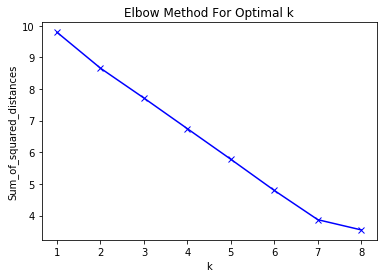

In [166]:
import matplotlib.pyplot as plt
plt.plot(kclusters, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [142]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
jacksonville_merged = Zips
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
jacksonville_merged = jacksonville_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Zip Codes')
jacksonville_merged['Cluster Labels'] =jacksonville_merged['Cluster Labels']
jacksonville_merged=jacksonville_merged.dropna()
jacksonville_merged

,Borough,Zip Codes,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Urban Core,32202,30.33,-81.65,1.0,Grocery Store,Gym / Fitness Center,Video Store,Discount Store,Food,Dog Run,Donut Shop,Concert Hall,Convenience Store,Cosmetics Shop
1,Urban Core,32204,30.32,-81.68,1.0,Gay Bar,Intersection,Park,Concert Hall,Café,Playground,Restaurant,Sandwich Place,Mexican Restaurant,Lake
2,Westside,32205,30.30,-81.72,5.0,Wings Joint,Fast Food Restaurant,Smoke Shop,Gift Shop,Donut Shop,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Department Store
3,Urban Core,32206,30.35,-81.64,0.0,Park,Wings Joint,Electronics Store,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf,Discount Store,Dive Bar
4,Arlington,32207,30.29,-81.64,1.0,Motel,BBQ Joint,Southern / Soul Food Restaurant,Wings Joint,Electronics Store,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf
5,Northside,32208,30.39,-81.68,1.0,Fast Food Restaurant,Chinese Restaurant,Discount Store,Convenience Store,BBQ Joint,Sandwich Place,Gas Station,Fried Chicken Joint,Intersection,Pharmacy
7,Westside,32210,30.27,-81.75,3.0,Discount Store,Wings Joint,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf,Dive Bar,Dog Run
8,Arlington,32211,30.33,-81.58,1.0,Lounge,Park,Dog Run,Gym / Fitness Center,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf,Discount Store
9,Westside,32212,30.22,-81.67,7.0,Harbor / Marina,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf,Discount Store,Dive Bar,Dog Run
10,Arlington,32216,30.28,-81.58,4.0,Restaurant,Wings Joint,Chinese Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf,Discount Store


In [189]:

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from folium.features import DivIcon
bestK=8
# create map
map_clusters = folium.Map(location=[30.336944, -81.661389], zoom_start=11)

# set color scheme for the clusters
x = np.arange(bestK)
ys = [i + x + (i*x)**2 for i in range(bestK)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(jacksonville_merged['latitude'], jacksonville_merged['longitude'], jacksonville_merged['Zip Codes'], jacksonville_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-2],
        fill=True,
        fill_color=rainbow[int(cluster-3)],
        fill_opacity=0.7).add_to(map_clusters)
       


p1 = [30.336944, -81.661389]
folium.Marker(p1, icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(7,20),
        html='<div style="font-size: 9pt; color : black">Urban Core</div>',
        )).add_to(map_clusters)

p2 = [30.18,-81.47]
folium.Marker(p1, icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(-100,-180),
        html='<div style="font-size: 9pt; color : black">Southside</div>',
        )).add_to(map_clusters)
#map_clusters.add_child(folium.CircleMarker(p1, radius=15))
map_clusters

In [154]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] == 0, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,32206,Park,Wings Joint,Electronics Store,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf,Discount Store,Dive Bar
23,32233,Park,Theater,Baseball Field,Wings Joint,Electronics Store,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf


In [155]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] == 1, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,32202,Grocery Store,Gym / Fitness Center,Video Store,Discount Store,Food,Dog Run,Donut Shop,Concert Hall,Convenience Store,Cosmetics Shop
1,32204,Gay Bar,Intersection,Park,Concert Hall,Café,Playground,Restaurant,Sandwich Place,Mexican Restaurant,Lake
4,32207,Motel,BBQ Joint,Southern / Soul Food Restaurant,Wings Joint,Electronics Store,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf
5,32208,Fast Food Restaurant,Chinese Restaurant,Discount Store,Convenience Store,BBQ Joint,Sandwich Place,Gas Station,Fried Chicken Joint,Intersection,Pharmacy
8,32211,Lounge,Park,Dog Run,Gym / Fitness Center,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf,Discount Store
11,32217,Gym Pool,Athletics & Sports,Gym,Gym / Fitness Center,Art Museum,Flower Shop,Credit Union,Department Store,Disc Golf,Discount Store
12,32218,Airport,General Travel,Parking,Wings Joint,Electronics Store,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf
17,32223,Food Truck,Electronics Store,Wings Joint,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf,Discount Store
18,32224,Pharmacy,Pool,Sculpture Garden,Shop & Service,Wings Joint,Cocktail Bar,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union
19,32225,Disc Golf,Soccer Field,Wings Joint,Electronics Store,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Discount Store


In [156]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] == 2, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,32226,Flower Shop,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf,Discount Store,Dive Bar,Dog Run


In [157]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] == 3, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,32210,Discount Store,Wings Joint,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf,Dive Bar,Dog Run


In [158]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] == 4, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,32216,Restaurant,Wings Joint,Chinese Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf,Discount Store


In [159]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] == 5, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,32205,Wings Joint,Fast Food Restaurant,Smoke Shop,Gift Shop,Donut Shop,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Department Store


In [160]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] == 6, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,32266,Beach,Wings Joint,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf,Discount Store,Dive Bar


In [161]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] == 7, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,32212,Harbor / Marina,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Credit Union,Department Store,Disc Golf,Discount Store,Dive Bar,Dog Run


In [162]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] == 8, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [136]:
jacksonville_merged.loc[jacksonville_merged['Cluster Labels'] == 9, jacksonville_merged.columns[[1] + list(range(5, jacksonville_merged.shape[1]))]]

,Zip Codes,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [89]:
jacksonville_merged

,Borough,Zip Codes,latitude,longitude
0,Urban Core,32202,30.33,-81.65
1,Urban Core,32204,30.32,-81.68
2,Westside,32205,30.30,-81.72
3,Urban Core,32206,30.35,-81.64
4,Arlington,32207,30.29,-81.64
5,Northside,32208,30.39,-81.68
6,Urban Core,32209,30.36,-81.70
7,Westside,32210,30.27,-81.75
8,Arlington,32211,30.33,-81.58
9,Westside,32212,30.22,-81.67


In [141]:
neighborhoods_venues_sorted.drop('Cluster Labels', axis=1, inplace=True)

In [114]:
cluster

nan

In [209]:
jacksonville_venues()

TypeError: 'DataFrame' object is not callable

In [192]:
nearby_venues

NameError: name 'nearby_venues' is not defined

In [193]:
results

NameError: name 'results' is not defined

In [203]:
venues_list=[]
for name, lat, lng in zip('Zip Codes', lat, lon):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        results
        

TypeError: zip argument #2 must support iteration

In [207]:
jacksonville_venues.groupby("Venue Category").count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
ATM,1,1,1,1,1,1
Airport,1,1,1,1,1,1
American Restaurant,2,2,2,2,2,2
Art Museum,1,1,1,1,1,1
Asian Restaurant,2,2,2,2,2,2
Athletics & Sports,1,1,1,1,1,1
Auto Workshop,1,1,1,1,1,1
BBQ Joint,4,4,4,4,4,4
Bank,3,3,3,3,3,3


In [205]:
jacksonville_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,32202,30.33,-81.65,Redbox,30.331273,-81.652633,Video Store
1,32202,30.33,-81.65,Harvey's Supermarket,30.330947,-81.651863,Grocery Store
2,32202,30.33,-81.65,Family Dollar,30.332724,-81.653231,Discount Store
3,32202,30.33,-81.65,Winn-dixie,30.330840,-81.651657,Grocery Store
4,32202,30.33,-81.65,Guns & Hoses Training Grounds,30.330872,-81.647464,Gym / Fitness Center
5,32202,30.33,-81.65,The Brown Bag Catering,30.326075,-81.649956,Food
6,32202,30.33,-81.65,Confederate Dog Park,30.333698,-81.652712,Dog Run
7,32204,30.32,-81.68,Jimmy Johns,30.319002,-81.678994,Sandwich Place
8,32204,30.32,-81.68,Riverside Park,30.316437,-81.680673,Park
9,32204,30.32,-81.68,Riverside Park Playground,30.316440,-81.680524,Playground


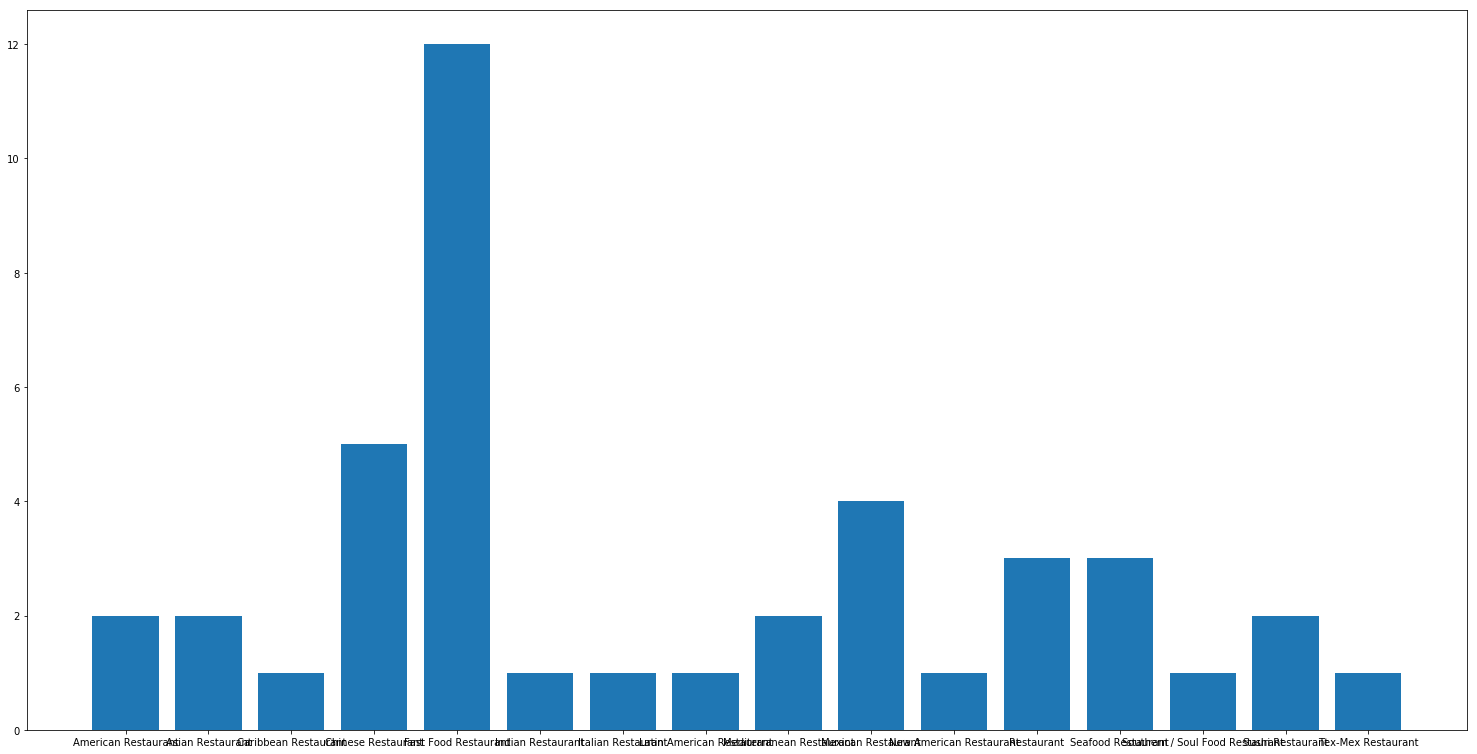

In [276]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])

ven = jacksonville_venues2['Venue Category']
y_pos = np.arange(len(ven))
students = jacksonville_venues2['Neighborhood']
ax.bar(ven,students)
plt.show()


In [273]:
jacksonville_venues2=jacksonville_venues.groupby('Venue Category').count().reset_index()
jacksonville_venues2

,Venue Category,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,ATM,1,1,1,1,1,1
1,Airport,1,1,1,1,1,1
2,American Restaurant,2,2,2,2,2,2
3,Art Museum,1,1,1,1,1,1
4,Asian Restaurant,2,2,2,2,2,2
5,Athletics & Sports,1,1,1,1,1,1
6,Auto Workshop,1,1,1,1,1,1
7,BBQ Joint,4,4,4,4,4,4
8,Bank,3,3,3,3,3,3
9,Bar,4,4,4,4,4,4


In [274]:
sub ='Restaurant'
jacksonville_venues2["Indexes"]= jacksonville_venues2["Venue Category"].str.find(sub) 
is_Restaurant =  jacksonville_venues2['Indexes']!=-1
jacksonville_venues2 =  jacksonville_venues2[is_Restaurant].reset_index(drop=True) 
#jacksonville_venues2=jacksonville_venues2['Venue Category']#.str.strip('Restaurant') 


In [275]:
jacksonville_venues2

,Venue Category,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Indexes
0,American Restaurant,2,2,2,2,2,2,9
1,Asian Restaurant,2,2,2,2,2,2,6
2,Caribbean Restaurant,1,1,1,1,1,1,10
3,Chinese Restaurant,5,5,5,5,5,5,8
4,Fast Food Restaurant,12,12,12,12,12,12,10
5,Indian Restaurant,1,1,1,1,1,1,7
6,Italian Restaurant,1,1,1,1,1,1,8
7,Latin American Restaurant,1,1,1,1,1,1,15
8,Mediterranean Restaurant,2,2,2,2,2,2,14
9,Mexican Restaurant,4,4,4,4,4,4,8


In [270]:
jacksonville_venues2

0                 American 
1                    Asian 
2                Caribbean 
3                  Chinese 
4                Fast Food 
5                   Indian 
6                  Italian 
7           Latin American 
8            Mediterranean 
9                  Mexican 
10            New American 
11                 Seafood 
12    Southern / Soul Food 
13                   Sushi 
14                 Tex-Mex 
Name: Venue Category, dtype: object